# Imports

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#darts
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler, MissingValuesFiller
from darts.datasets import EnergyDataset
from darts.models import NBEATSModel
from darts.metrics import r2_score, rmse
from tqdm.auto import tqdm




In [15]:
#loading the data saved from data_prepocessing
data = pd.read_csv('df_clean.csv')


In [20]:
# changing into date and time
data['date'] = pd.to_datetime(data['date'], format='%d.%m.%Y %H:%M')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3480 entries, 0 to 3479
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3480 non-null   datetime64[ns]
 1   price   3480 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 81.6 KB


In [23]:
series = TimeSeries.from_dataframe(data, time_col='date', value_cols = 'price', fill_missing_dates=True, freq=None)

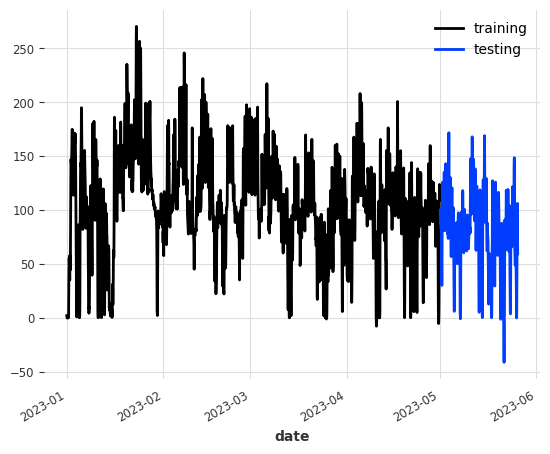

In [25]:
# dart recommendation, splitting dataset into train and test
# around 5 months train and 1 month test
# no random split as the data is timeseries data
train, test = series.split_after(pd.Timestamp('05.01.2023 00:00'))
train.plot(label="training")
test.plot(label="testing")

# Nbeats Model

In [45]:
# explaining nbeats model 
model_nbeats = NBEATSModel(
    input_chunk_length=168,
    output_chunk_length=48,
    generic_architecture=True,
    num_stacks=10,
    num_blocks=1,
    num_layers=4,
    layer_widths=512,
    n_epochs=100,
    nr_epochs_val_period=1,
    batch_size=800,
    model_name="nbeats_run",
)

In [31]:
model_nbeats.fit(train, val_series=test, verbose=False)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=100` reached.


NBEATSModel(generic_architecture=True, num_stacks=10, num_blocks=1, num_layers=4, layer_widths=512, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=ReLU, input_chunk_length=168, output_chunk_length=48, n_epochs=100, nr_epochs_val_period=1, batch_size=800, model_name=nbeats_run)

In [32]:
pred_series = model_nbeats.historical_forecasts(
    series,
    start=pd.Timestamp('05.01.2023 00:00'),
    forecast_horizon=7,
    stride=5,
    retrain=False,
    verbose=False,
)


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU ava

In [ ]:
#pred_series.to_csv("TEST.csv")

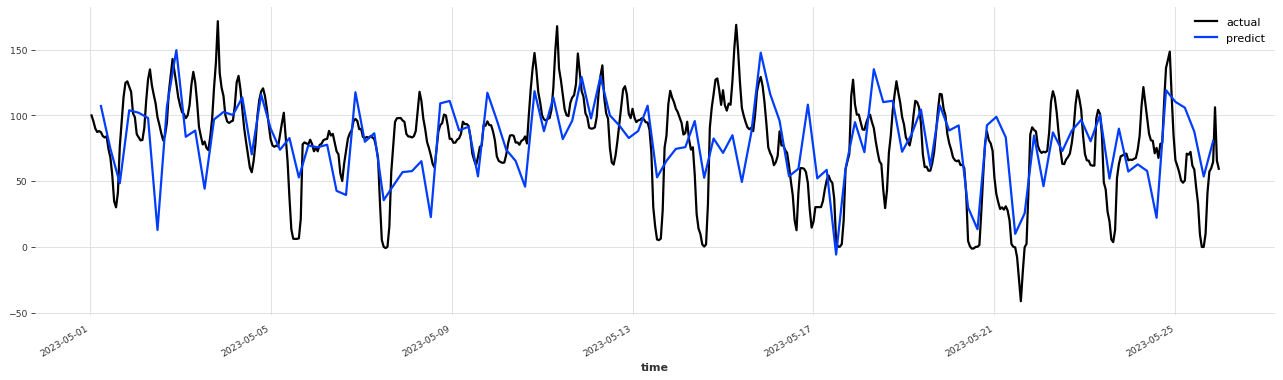

In [34]:
plt.figure(figsize=(20, 5), dpi=80)
test.plot(label="actual")
pred_series.plot(label="predict")
plt.show()

In [40]:
nbeats_rmse = rmse(test, pred_series)
nbeats_r2   = r2_score(test, pred_series)

In [42]:
print("RMSE : ", nbeats_rmse)
print("R2 score : ", nbeats_r2)

RMSE :  28.42436945220846
R2 score :  0.2764360489142009
